In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_table("Nara.10k.windows.bed",header=None)
df.columns=["chrom","start","end"]
#Create new column that will be the key column called interval
df["interval"]=df["chrom"]+":"+df["start"].astype(str)+"-"+df["end"].astype(str)
df.head()
df.shape

(5967, 4)

In [6]:
#Merge outputs from bcdt
def mergedf(strain,olddf):
    strainfile = (strain+".bcdt.rpkm.bedgraph")
    straindf = pd.read_table(strainfile,header=None)
    straindf.columns = ["chrom","start","end",strain]
    straindf["interval"]=straindf["chrom"]+":"+straindf["start"].astype(str)+"-"+straindf["end"].astype(str)
    straindf = straindf[["interval",strain]]
    newdf = pd.merge(olddf,straindf,how="outer",on="interval")
    return newdf
strainlist = ["S1","S4","413","245","NTL1-1b","415","Cg363","CAD5","CAD1",
              "CAD2","CAD4","Cg56","CglS","CGW01"]
df2 = df
for strain in strainlist:
    df2 = mergedf(strain,df2)
    
df2=df2.fillna(0)

df2.to_csv("merge.bcdt.rpkm.out",index=False)
df2.head()
df2.shape

df3 = df2[df2["chrom"]!=0]
df3.shape

(5967, 18)

In [7]:
df4=df3[["chrom","interval","S1","S4","413","245","NTL1-1b","415","Cg363","CAD5","CAD1",
        "CAD2","CAD4","Cg56","CglS","CGW01"]]
df4.head()

#Log of RPKM values
def scale(x):
    logscale = np.log10(x+1)
    return logscale
df4[["S1","S4","413","245","NTL1-1b","415","Cg363","CAD5","CAD1","CAD2","CAD4","Cg56","CglS",
     "CGW01"]]=df4[["S1","S4","413","245","NTL1-1b","415","Cg363","CAD5","CAD1","CAD2","CAD4",
                    "Cg56","CglS","CGW01"]].apply(scale)
df4.shape

/home/Pam/bin/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


(5967, 16)

In [14]:
import seaborn as sns
import matplotlib.pylab as plt

df5 = pd.DataFrame(np.zeros((5967, 16)))
df5.columns=["chrom","interval","S1","S4","413","245","NTL1-1b","415","Cg363","CAD5","CAD1","CAD2","CAD4","Cg56","CglS","CGW01"]
df5.head()

,chrom,interval,S1,S4,413,245,NTL1-1b,415,Cg363,CAD5,CAD1,CAD2,CAD4,Cg56,CglS,CGW01
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
new_df = df4
df5.update(new_df)


df5.head()

,chrom,interval,S1,S4,413,245,NTL1-1b,415,Cg363,CAD5,CAD1,CAD2,CAD4,Cg56,CglS,CGW01
0,Nara_c01,Nara_c01:0-10000,1.614063,1.421369,1.327982,1.319277,0.840255,1.899717,0.009617,0.000943,0.612257,0.000000,0.000000,0.742615,0.000000,0.000000
1,Nara_c01,Nara_c01:10000-20000,1.250830,1.198822,1.301017,1.203987,1.112209,1.390299,0.915924,0.686931,0.955631,0.398277,0.386212,0.685369,0.357746,0.014552
2,Nara_c01,Nara_c01:20000-30000,1.285679,1.302619,1.299331,1.234945,1.279167,1.293201,1.258654,1.269592,1.286742,1.304057,1.272529,0.822177,1.305414,1.227043
3,Nara_c01,Nara_c01:30000-40000,1.241843,1.263880,1.268917,1.284602,1.307969,1.257966,1.331824,1.341978,1.351661,1.328172,1.341102,1.135209,1.333584,1.114601
4,Nara_c01,Nara_c01:40000-50000,1.225958,1.262807,1.292772,1.296566,1.297730,1.256056,1.324517,1.363557,1.357660,1.337461,1.362036,1.318541,1.273353,1.318891


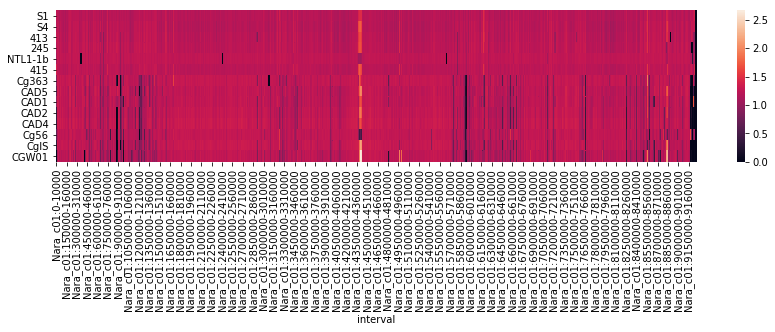

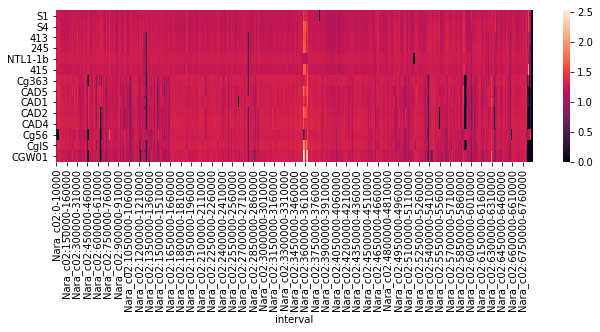

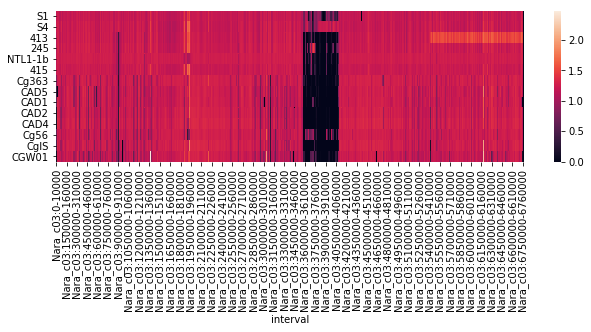

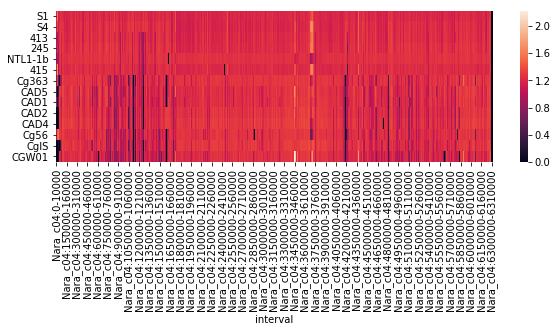

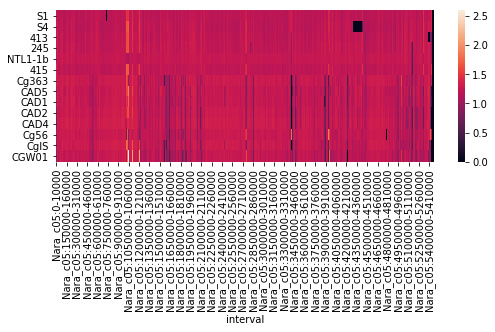

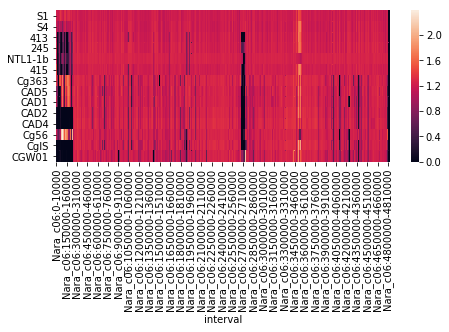

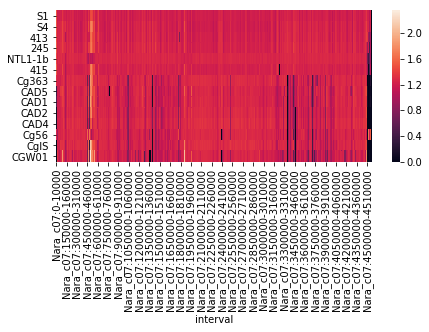

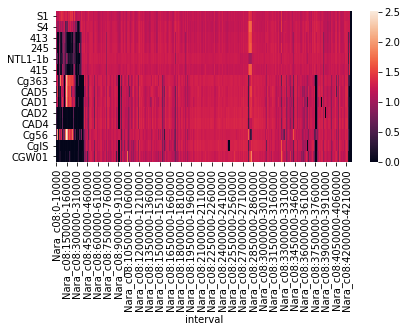

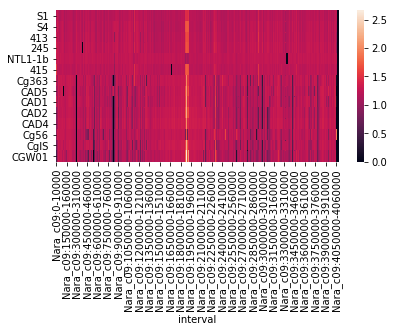

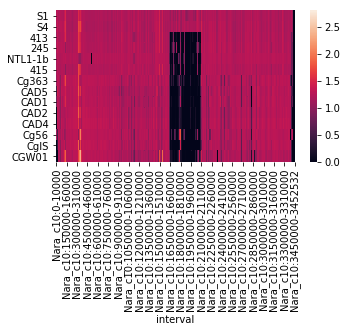

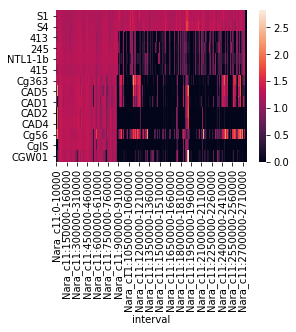

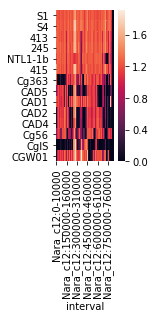

In [16]:
# start by specifying cell size and margins
cellwidth = 0.012 #inch
cellheight = 0.15
marg_top = 0.7
marg_bottom = 0.7
marg_left = 0.7
marg_right = 0.7

# number of cells along width

# determine figure width
cols=["Nara_c01","Nara_c02","Nara_c03","Nara_c04","Nara_c05",
      "Nara_c06","Nara_c07","Nara_c08","Nara_c09","Nara_c10","Nara_c11", "Nara_c12"]

for contigs in cols:
    test=df5[df5["chrom"]==contigs]
    test=test.reset_index()
    test=test.drop(["index"],axis=1)
    test=test.drop(["chrom"],axis=1)
    test.index=test["interval"]
    test=test.drop(["interval"],axis=1)
    test=np.transpose(test)
    cells_in_column=test.shape[0]
    cells_in_row = test.shape[1]
    # calculate figure height in inches
    figheight = cellheight*cells_in_column+marg_top+marg_bottom
    figwidth = cellwidth* cells_in_row + marg_left+marg_right
    # set figure size
    fig = plt.figure(figsize=(figwidth, figheight))
    # adjust margins (relative numbers) according to absolute values
    fig.subplots_adjust(bottom =marg_bottom/figheight ,top=1.-marg_top/figheight,
                        left=marg_left/figwidth, right=1.-marg_right/figwidth)
    sns.heatmap(test)
    filename = (contigs+".pdf")
    fig.savefig(filename.format(cells_in_column),format="pdf")
